# Task 2:Supervised Machine Learning-Linear Regression

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

What will be predicted score if a student study for 9.25 hrs in a day?


In [46]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
url = "http://bit.ly/w-data"
df=pd.read_csv(url);
print("Data Imported")
df.head(10)

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Saving Data for Future References 

In [20]:
df.to_csv('hours-score_data')

In [21]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
print(df.dtypes)

Hours     float64
Scores      int64
dtype: object


# Visualization  

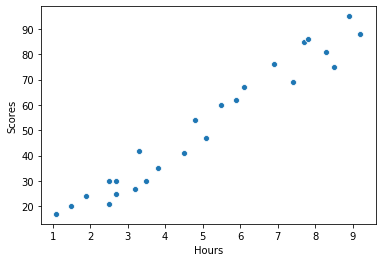

In [23]:
sns.scatterplot(df.Hours, df.Scores);

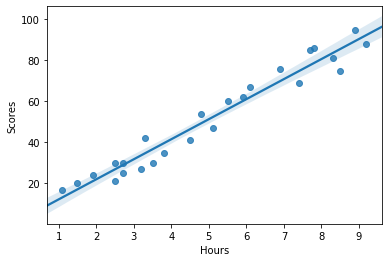

In [24]:
sns.regplot(df.Hours,df.Scores);

### In above Regplot we can directly see the relation ship between Scores and Hours

## Linear relationship between Hours and Scores, we can proceed with Linear Regression

### Data preparation

In [26]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the algorithm

In [30]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


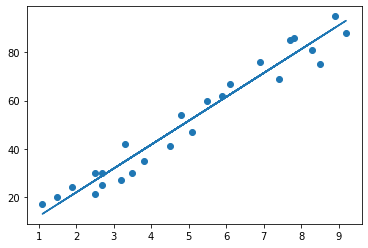

In [32]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Prediction 

In [34]:
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = lm.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


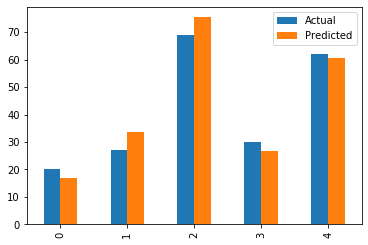

In [44]:
df1.plot(kind='bar')

## Result score for 9.25 Hours


In [38]:
# You can also test with your own data
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating the model

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
